In [1]:
import pystac

In [2]:
file_items = pystac.ItemCollection.from_file("rhodes_sentinel-2.json")

In [3]:
for item in file_items:
    print(item.id)
    print(item.datetime)

S2A_35SNA_20230827_0_L2A
2023-08-27 09:00:21.327000+00:00
S2B_35SNA_20230822_0_L2A
2023-08-22 09:00:20.047000+00:00
S2A_35SNA_20230817_0_L2A
2023-08-17 09:00:21.370000+00:00
S2B_35SNA_20230812_0_L2A
2023-08-12 09:00:21.069000+00:00
S2A_35SNA_20230807_0_L2A
2023-08-07 09:00:20.107000+00:00
S2B_35SNA_20230802_0_L2A
2023-08-02 09:00:20.321000+00:00
S2A_35SNA_20230728_0_L2A
2023-07-28 09:00:20.662000+00:00
S2B_35SNA_20230723_0_L2A
2023-07-23 09:00:21.476000+00:00
S2A_35SNA_20230718_0_L2A
2023-07-18 09:00:19.860000+00:00
S2B_35SNA_20230713_0_L2A
2023-07-13 09:00:20.114000+00:00
S2A_35SNA_20230708_0_L2A
2023-07-08 09:00:20.745000+00:00


In [4]:
print(file_items[-1])

<Item id=S2A_35SNA_20230708_0_L2A>


In [5]:
assets = file_items[-1].assets  # last item's asset dictionary
print(assets.keys())

dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])


In [6]:
red_href = assets["red"].href

In [7]:
red_href

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/S/NA/2023/7/S2A_35SNA_20230708_0_L2A/B04.tif'

In [8]:
file_items[-1].assets.keys()

dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])

In [9]:
print(file_items[-1])

<Item id=S2A_35SNA_20230708_0_L2A>


In [10]:
import rioxarray
red = rioxarray.open_rasterio(red_href)

In [11]:
print(red)

<xarray.DataArray (band: 1, y: 10980, x: 10980)> Size: 241MB
[120560400 values with dtype=uint16]
Coordinates:
  * band         (band) int32 4B 1
  * x            (x) float64 88kB 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05
  * y            (y) float64 88kB 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0


In [12]:
red.values

array([[[  0,   0,   0, ..., 253, 280, 256],
        [  0,   0,   0, ..., 217, 302, 263],
        [  0,   0,   0, ..., 280, 322, 301],
        ...,
        [  0,   0,   0, ..., 273, 352, 302],
        [  0,   0,   0, ..., 357, 374, 320],
        [  0,   0,   0, ..., 320, 452, 350]]], dtype=uint16)

In [12]:
print(red.rio.crs)
print(red.rio.nodata)
print(red.rio.bounds())
print(red.rio.width)
print(red.rio.height)

EPSG:32635
0
(499980.0, 3990240.0, 609780.0, 4100040.0)
10980
10980


In [13]:
print(red.rio.resolution())

(10.0, -10.0)


In [24]:
visual = rioxarray.open_rasterio(red_href, overview_level=2)

In [25]:
print(visual)

<xarray.DataArray (band: 1, y: 1373, x: 1373)> Size: 4MB
[1885129 values with dtype=uint16]
Coordinates:
  * band         (band) int32 4B 1
  * x            (x) float64 11kB 5e+05 5.001e+05 ... 6.097e+05 6.097e+05
  * y            (y) float64 11kB 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0


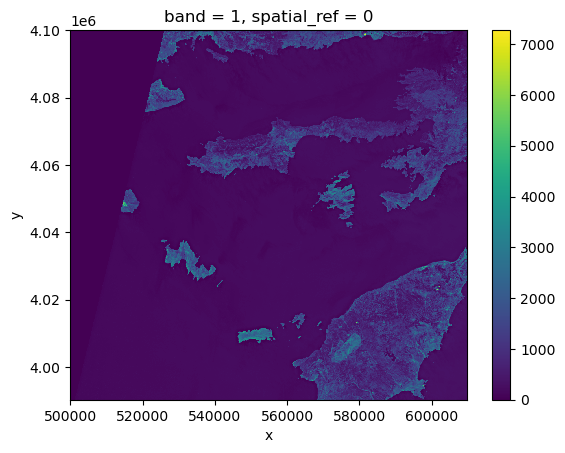

In [27]:
visual.squeeze().plot.imshow()

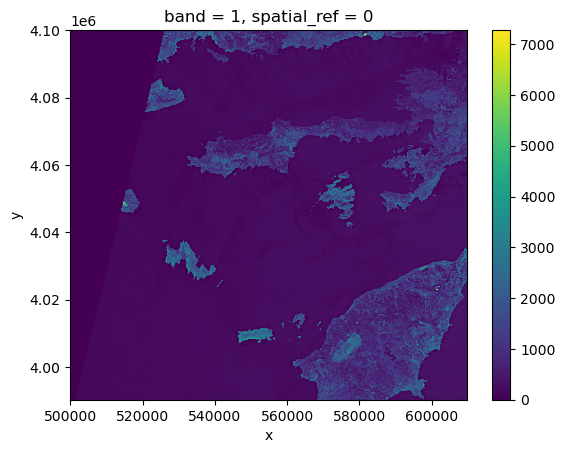

In [32]:
visual.plot()

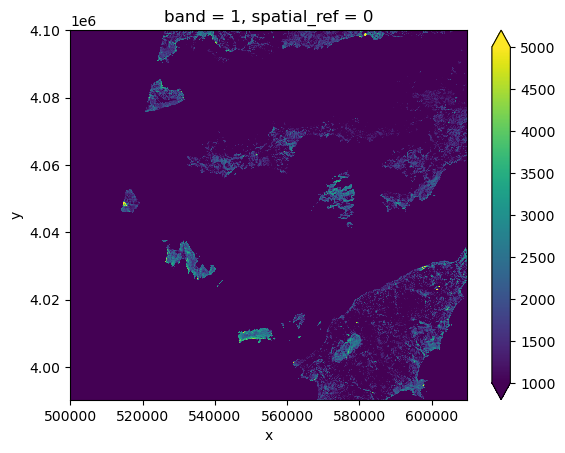

In [34]:
visual.plot(vmin=1000, vmax=5000)

In [ ]:
red_lowres = rioxarray.open_rasterio('red.tif', overview_level=2)

In [ ]:
red_lowres

In [ ]:
red_lowres.plot()

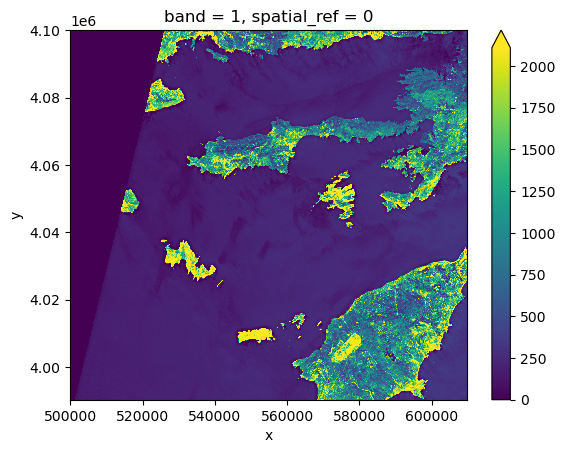

In [38]:
visual.squeeze().plot.imshow(robust=True)

## View Raster Coordinate Reference System (CRS) in Python

In [ ]:
red.rio.crs

In [ ]:
epsg = red.rio.crs.to_epsg()
epsg

In [ ]:
from pyproj import CRS
crs = CRS(epsg)
crs

## Dealing with Missing Data

In [ ]:
red_nodata = rioxarray.open_rasterio('red.tif', masked=True, overview_level=2)

In [ ]:
red_nodata

In [ ]:
red_lowres.where(red_lowres != red_lowres.rio.nodata)

In [ ]:
red_nodata.plot(robust=True)

## Raster Bands

In [ ]:
import pystac
items = pystac.ItemCollection.from_file('rhodes_sentinel-2.json')

In [ ]:
visual_lowres = rioxarray.open_rasterio(items[0].assets['visual'].href, overview_level=2)
visual_lowres

In [ ]:
visual_lowres.shape

In [ ]:
visual_lowres.plot()

In [ ]:
visual_lowres.plot.imshow()